<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


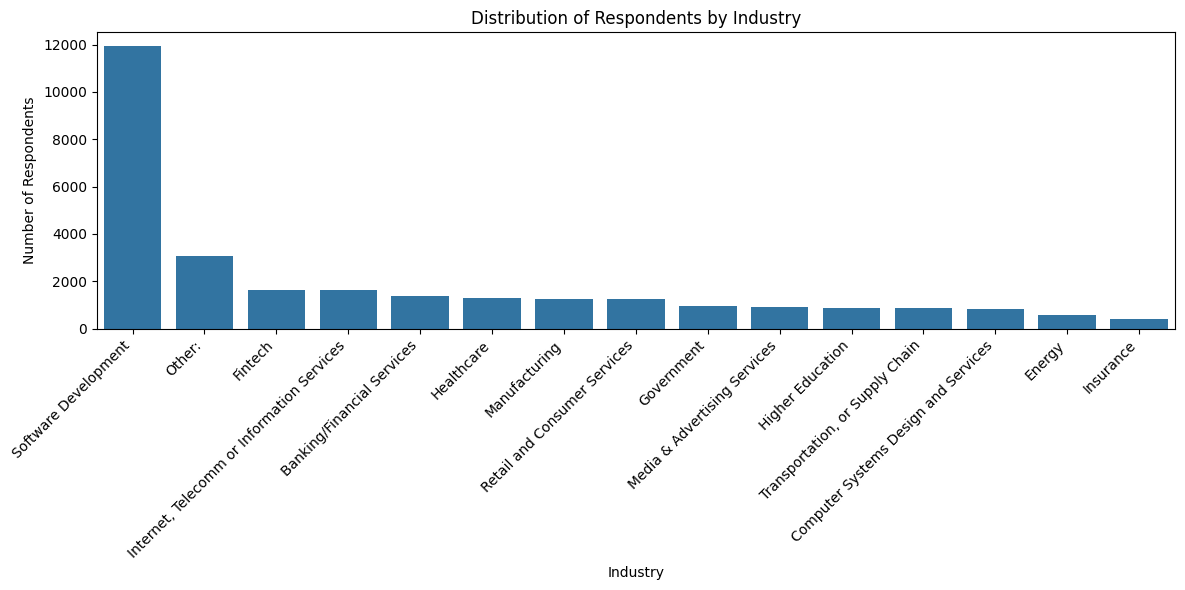

Notable Trends: The bar chart shows the distribution of respondents across industries. Industries with the highest counts indicate where most developers are employed, while those with fewer respondents may represent niche or less common sectors.


In [3]:
##Write your code here
# Plot a bar chart for the distribution of Industry
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Highlight notable trends
print("Notable Trends: The bar chart shows the distribution of respondents across industries. "
      "Industries with the highest counts indicate where most developers are employed, "
      "while those with fewer respondents may represent niche or less common sectors.")

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Calculate basic statistics for ConvertedCompYearly
comp_stats = df['ConvertedCompYearly'].describe()
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()
threshold = mean_comp + 3 * std_comp

print("Basic Statistics for ConvertedCompYearly:\n", comp_stats)
print(f"\nMean: {mean_comp:.2f}, Std Dev: {std_comp:.2f}")
print(f"Threshold for High Compensation (3 Std Dev above mean): {threshold:.2f}")

# Identify outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"\nNumber of High Compensation Outliers: {len(high_comp_outliers)}")
print("Sample High Compensation Outliers:\n", high_comp_outliers[['ConvertedCompYearly']].head())

Basic Statistics for ConvertedCompYearly:
 count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Mean: 86155.29, Std Dev: 186756.97
Threshold for High Compensation (3 Std Dev above mean): 646426.21

Number of High Compensation Outliers: 89
Sample High Compensation Outliers:
       ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.00, Q3: 107971.50, IQR: 75259.50
Lower Bound: -80177.25, Upper Bound: 220860.75
Number of Outliers Detected by IQR: 978


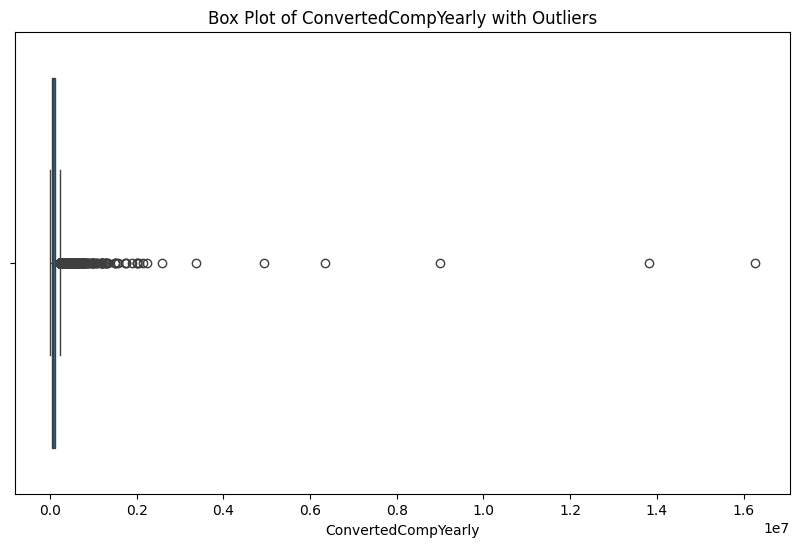

In [5]:
##Write your code here
# Calculate IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of Outliers Detected by IQR: {len(outliers)}")

# Visualize with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly with Outliers')
plt.xlabel('ConvertedCompYearly')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original DataFrame Size: (65437, 114)
New DataFrame Size (without outliers): (22457, 114)
Number of Rows Removed: 42980


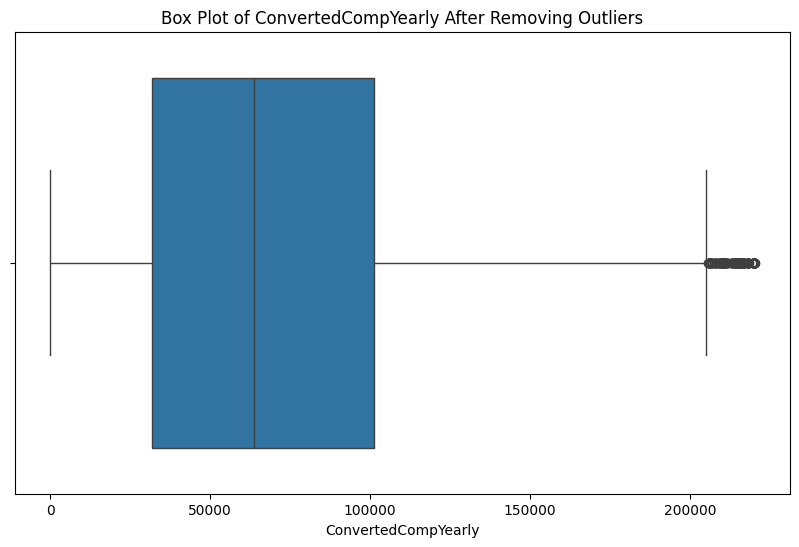

In [6]:
##Write your code here
# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print("Original DataFrame Size:", df.shape)
print("New DataFrame Size (without outliers):", df_no_outliers.shape)
print(f"Number of Rows Removed: {df.shape[0] - df_no_outliers.shape[0]}")

# Optional: Verify with a new box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly After Removing Outliers')
plt.xlabel('ConvertedCompYearly')
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation of AgeNumeric with other numeric variables:
 AgeNumeric             1.000000
WorkExp                0.850655
ConvertedCompYearly    0.121512
JobSat                 0.069844
CompTotal             -0.002761
JobSatPoints_1        -0.027908
ResponseId            -0.037967
JobSatPoints_8        -0.046092
JobSatPoints_6        -0.050228
JobSatPoints_4        -0.076032
JobSatPoints_9        -0.081633
JobSatPoints_7        -0.082683
JobSatPoints_5        -0.101475
JobSatPoints_11       -0.107092
JobSatPoints_10       -0.114350
Name: AgeNumeric, dtype: float64


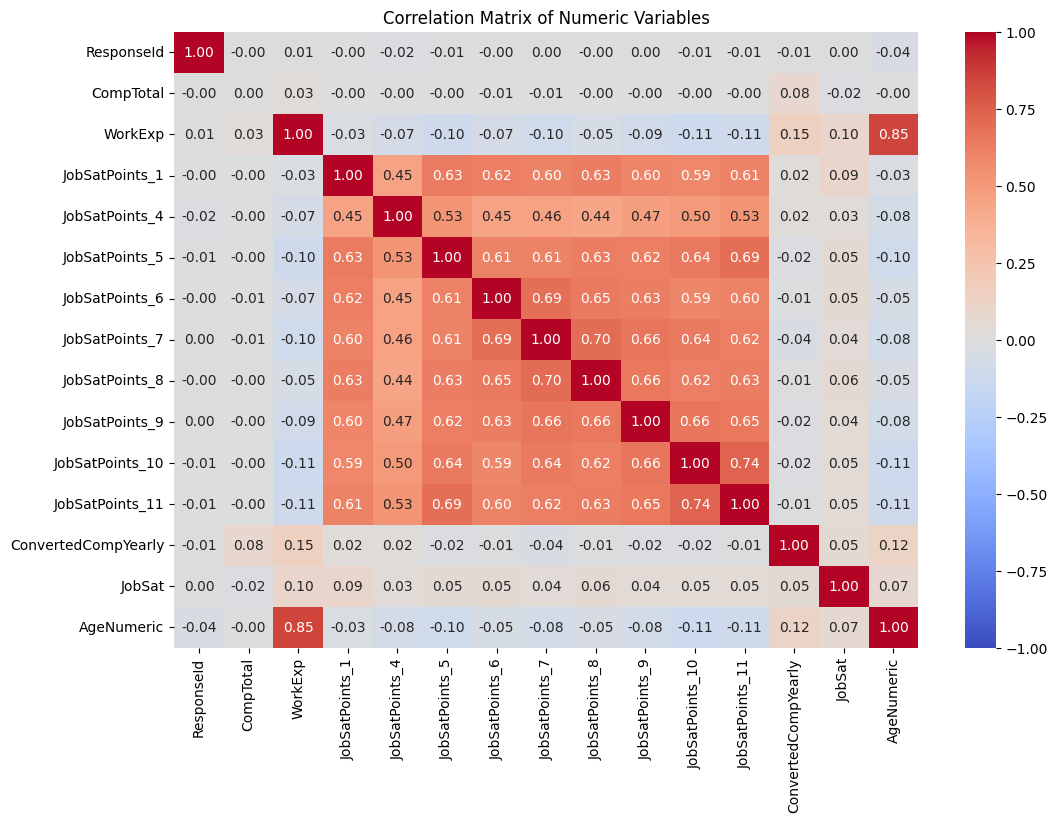

In [7]:
##Write your code here
# Map Age to approximate numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Compute correlation with AgeNumeric
print("Correlation of AgeNumeric with other numeric variables:\n", correlation_matrix['AgeNumeric'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
